# Train a model with _Bike Rental Data_ using XGBoost
## This notebook will use _XGBoost_ locally.
This section will work with XGBoost as a local installation to the instance.

* This will take several minutes to train (even with a small amount of data)
* When algorithm supported by *Python*, the data can be locally to the instance

**Kernel used:** Conda with TensorFlow Python 3.6.5 for Amazon Elastic Instance *(conda_amazonei_tensorflow_p36)*

### First update *conda* and *pip* to latest version

In [ ]:
!conda update -n base conda
!pip install --upgrade pip

### Ensure required packages are installed

In [1]:
!conda list nb_conda
!conda list numpy
!conda list pandas
!conda list pip
!conda list python
!conda list matplotlib

# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
nb_conda                  2.2.1                    py36_2    conda-forge
nb_conda_kernels          2.2.2                    py36_0    conda-forge
# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
numpy                     1.17.4                    <pip>
numpy                     1.14.3           py36hcd700cb_1  
numpy-base                1.14.3           py36h9be14a7_1  
numpydoc                  0.8.0                    py36_0  
# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
pandas                    0.24.2           py36he6710b0_0  
# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name     

### Major Library Versions Used

| Library | Version |
|---------|:--------|
| nb_conda | 2.2.1 |
| matplotlib | 3.0.3 |
| numpy | 1.17.4 |
| pandas | 0.24.2 |
| pip | 20.2 |
| python | 3.6.5 |
| xgboost | 0.90 |

## Install xgboost

In [5]:
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [16]:
## Import Libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost
import xgboost as xgb

## Load Data Files from Data Preparation Phase

In [17]:
column_list_file = 'bikeTrain_column_list.txt'
train_file = 'bikeTraining.csv'
validation_file ='bikeValidation.csv'
test_file ='bikeTest.csv'

In [18]:
columns = '' # setup columns variable as empty string
with open(column_list_file,'r') as f:
    columns = f.read().split(',') # columns read from text file containing CSV

In [19]:
columns # data check

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

### Specify Column Names as the File Does Not Have Header

In [20]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [21]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,39,3,0,1,1,28.70,32.575,65,7.0015,2011,7,5,1,1
1,627,3,0,1,2,35.26,37.120,30,0.0000,2012,7,3,1,18
2,744,2,0,1,1,29.52,32.575,32,30.0026,2012,6,13,2,18
3,280,3,0,1,1,27.06,31.060,61,15.0013,2011,9,1,3,20
4,172,1,0,1,1,9.02,11.365,51,11.0014,2011,1,6,3,17


In [22]:
df_validation.head() # data check

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,21,2,0,1,1,15.58,19.695,76,8.9981,2011,4,14,3,0
1,5,3,0,1,1,25.42,29.545,73,7.0015,2011,9,15,3,2
2,39,4,0,0,2,14.76,18.180,100,6.0032,2012,12,8,5,7
3,280,4,0,1,2,20.50,24.240,63,16.9979,2012,12,4,1,21
4,38,1,0,1,1,13.12,14.395,53,26.0027,2012,2,3,4,0


### Separating Features and Targets for Training and Validation
This is in preparation for use in XGBoost's regressor
*Note: Remember that Python indices start at 0*

In [29]:
x_train = df_train.iloc[:,1:] # Features: Seconds [1] Column to the end
y_train = df_train.iloc[:,0].ravel() # Target is the first column [0]th

x_validation = df_validation.iloc[:,1:] # Features: Seconds [1] Column to the end
y_validation = df_validation.iloc[:,0].ravel() # Target is the first column [0]th

## Set Up XGBoost Regressor

Below cells will set up the training instance, set the hyperparameters, and then fit the model to the training data.

Find Distributed (Deep) Machine Learning Community's XGBoost Training Parameter Reference [here](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)

In this project, I updated the following parameters:
```reg:squarederror``` as ```reg:linear``` is deprecated.

Additionally, I am to add my tuning to the _XGBoost_ Regressor.

### Create Regressor

In [37]:
# Create regressor
# XGBoost Training Parameters Reference:
# https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
# Limited the depth to 5 vice 6.
# n_estimators helps tune the number of Decision Trees in XGBoost

regressor = xgb.XGBRegressor(max_depth=5, n_estimators=200, objective='reg:squarederror')
# n_estimators at 150, 200 over to 250 results in little additional log loss reduction

In [38]:
regressor # display hyperparameters. This is my habit to ensure my settings are correct \\
# before I run a regressor. Note: This will display at the end of the training model process, as well.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [39]:
regressor.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_validation, y_validation)])

[0]	validation_0-rmse:243.718	validation_1-rmse:236.664
[1]	validation_0-rmse:224.044	validation_1-rmse:217.542
[2]	validation_0-rmse:206.908	validation_1-rmse:200.86
[3]	validation_0-rmse:191.847	validation_1-rmse:186.218
[4]	validation_0-rmse:178.294	validation_1-rmse:173.094
[5]	validation_0-rmse:166.452	validation_1-rmse:161.661
[6]	validation_0-rmse:156.192	validation_1-rmse:151.816
[7]	validation_0-rmse:147.382	validation_1-rmse:143.204
[8]	validation_0-rmse:138.389	validation_1-rmse:134.299
[9]	validation_0-rmse:129.704	validation_1-rmse:126.004
[10]	validation_0-rmse:123.099	validation_1-rmse:119.679
[11]	validation_0-rmse:116.773	validation_1-rmse:113.491
[12]	validation_0-rmse:109.191	validation_1-rmse:106.171
[13]	validation_0-rmse:104.466	validation_1-rmse:101.523
[14]	validation_0-rmse:99.741	validation_1-rmse:97.3045
[15]	validation_0-rmse:96.1516	validation_1-rmse:93.8213
[16]	validation_0-rmse:92.2573	validation_1-rmse:89.9803
[17]	validation_0-rmse:86.7733	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [40]:
eval_result = regressor.evals_result()

In [41]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [42]:
print(training_rounds) # check

range(0, 200)


## Plot the Training vs. Validation Errors

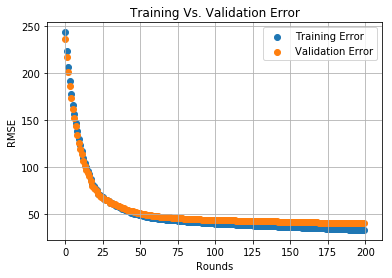

In [44]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Rounds')
plt.ylabel('RMSE')
plt.title('Training Vs. Validation Error')
plt.legend()
plt.show()

### XGBoost Feature Importance
By default, the graph displays as a horiztonal bar with counters.

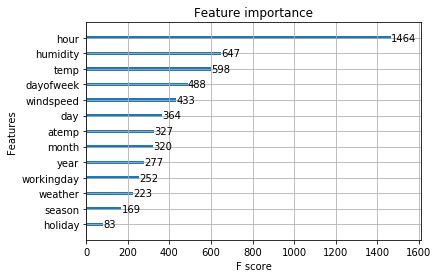

In [45]:
xgb.plot_importance(regressor)

### Verify Quality using Validation Dataset

In [48]:
df = pd.read_csv(validation_file,names=columns)
# compare actual vs. predicted performance with dataset not seen by the model

In [49]:
df.head() # data check

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,21,2,0,1,1,15.58,19.695,76,8.9981,2011,4,14,3,0
1,5,3,0,1,1,25.42,29.545,73,7.0015,2011,9,15,3,2
2,39,4,0,0,2,14.76,18.180,100,6.0032,2012,12,8,5,7
3,280,4,0,1,2,20.50,24.240,63,16.9979,2012,12,4,1,21
4,38,1,0,1,1,13.12,14.395,53,26.0027,2012,2,3,4,0


In [51]:
df.shape # display a tuple that represents Dataframe's dimensionality (columns, rows, depth, etc.)

(3266, 14)

In [52]:
x_test = df.iloc[:,1:]
print(x_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       2        0           1        1  15.58  19.695        76     8.9981   
1       3        0           1        1  25.42  29.545        73     7.0015   
2       4        0           0        2  14.76  18.180       100     6.0032   
3       4        0           1        2  20.50  24.240        63    16.9979   
4       1        0           1        1  13.12  14.395        53    26.0027   

   year  month  day  dayofweek  hour  
0  2011      4   14          3     0  
1  2011      9   15          3     2  
2  2012     12    8          5     7  
3  2012     12    4          1    21  
4  2012      2    3          4     0  


In [53]:
result = regressor.predict(x_test)

In [54]:
result[:5]

array([ 23.831797,  20.826345, 132.37997 , 283.292   ,  37.15278 ],
      dtype=float32)

In [55]:
df['count_predicted'] = result

In [56]:
df.head() # new column at the end

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,21,2,0,1,1,15.58,19.695,76,8.9981,2011,4,14,3,0,23.831797
1,5,3,0,1,1,25.42,29.545,73,7.0015,2011,9,15,3,2,20.826345
2,39,4,0,0,2,14.76,18.180,100,6.0032,2012,12,8,5,7,132.379974
3,280,4,0,1,2,20.50,24.240,63,16.9979,2012,12,4,1,21,283.291992
4,38,1,0,1,1,13.12,14.395,53,26.0027,2012,2,3,4,0,37.152779


### Negative Values can appear in predictions
Displayed through _pandas_ DataFrame Describe function

_Generate descriptive statistics_

In [57]:
df['count_predicted'].describe()

count    3266.000000
mean      188.432587
std       171.534744
min      -102.561203
25%        39.951478
50%       148.087227
75%       287.473175
max       871.696167
Name: count_predicted, dtype: float64

### Finding All Negative Values for Zeroizing
Sometimes, regressors predict values that do not match the problem's context.

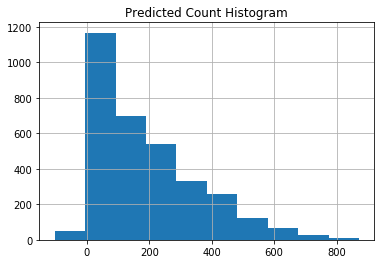

In [61]:
df['count_predicted'].hist()
plt.title('Predicted Count Histogram')
plt.show()
# There are values below 0

In [60]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
86,3,1,0,0,1,8.20,12.880,86,0.0000,2011,1,1,5,7,-53.832428
89,1,1,0,0,2,9.84,12.880,75,6.0032,2011,1,1,5,5,-5.437222
117,3,1,0,1,3,14.76,17.425,93,16.9979,2012,1,12,3,3,-4.428140
132,1,1,0,0,1,10.66,12.880,60,15.0013,2011,2,6,6,6,-4.088346
160,2,1,0,0,1,10.66,13.635,93,8.9981,2012,1,1,6,6,-1.724969
177,6,4,0,0,3,16.40,20.455,94,7.0015,2012,12,9,6,6,-1.231407
189,2,1,0,0,1,9.02,11.365,69,12.9980,2011,3,12,5,5,-3.985568
210,33,2,0,0,1,13.12,15.150,57,15.0013,2011,4,3,6,7,-0.830521
219,7,1,0,1,1,15.58,19.695,37,23.9994,2011,2,14,0,1,-0.431802
223,2,1,0,1,1,8.20,9.090,64,19.0012,2011,3,1,1,5,-0.181947


### Adjust the Count

In [62]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [63]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [64]:
df[df['count_predicted'] < 0] # double-check

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


## Plot Actual vs. Predicted

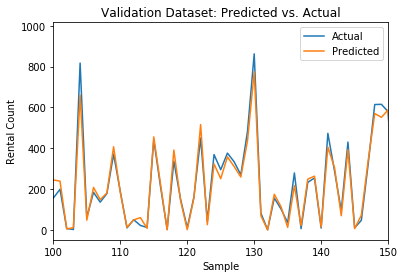

In [65]:
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Rental Count')
plt.xlim([100,150])
plt.title('Validation Dataset: Predicted vs. Actual')
plt.legend()
plt.show()

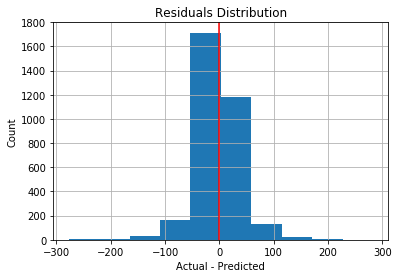

In [66]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [67]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.48
 Over  Estimation: 0.52


### Print Metrics of the Model

In [79]:
# Current Model's RMSE
print("Model's RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

Model's RMSE: 39.83


In [80]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.5204422545515218


In [75]:
# RMSlE - Root Mean Squared Log Error
# RMSLE Metric is used by Kaggle

# RMSE Cost Function - Magnitude of difference matters

# RMSLE cost function - "Only Percentage difference matters"

# Reference:Katerina Malahova, Khor SoonHin 
# https://www.slideshare.net/KhorSoonHin/rmsle-cost-function
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [76]:
print('RMSLE')
print(compute_rmsle(100,50),
      compute_rmsle(1000,500),
      compute_rmsle(10000,5000))

RMSLE
0.683294884116934 0.6921486782303559 0.6930471955576127


In [77]:
print('RMSE')
print(mean_squared_error([100],[50])**.5,
      mean_squared_error([1000],[500])**.5, 
      mean_squared_error([10000],[5000])**.5)

RMSE
50.0 500.0 5000.0


## Prepare Data for Kaggle Submission

In [81]:
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [82]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [84]:
x_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [85]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [86]:
result = regressor.predict(x_test)

In [87]:
result[:5]

array([18.265297, -6.443683, -9.615452, -3.498049, -3.498049],
      dtype=float32)

In [88]:
df_test["count"] = result

In [89]:
df_test.head() # data checck

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,18.265297
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-6.443683
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-9.615452
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-3.498049
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-3.498049


In [90]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,-6.443683
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-9.615452
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,-3.498049
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,-3.498049
27,2011-01-21 03:00:00,1,0,1,3,9.02,10.605,80,19.9995,2011,1,21,4,3,-7.394711
28,2011-01-21 04:00:00,1,0,1,2,9.02,12.880,87,6.0032,2011,1,21,4,4,-7.698482
52,2011-01-22 04:00:00,1,0,0,2,0.82,0.760,48,19.9995,2011,1,22,5,4,-4.991692
53,2011-01-22 06:00:00,1,0,0,2,0.82,1.515,44,15.0013,2011,1,22,5,6,-7.639806
54,2011-01-22 07:00:00,1,0,0,1,0.82,0.760,44,19.0012,2011,1,22,5,7,-40.009003
55,2011-01-22 08:00:00,1,0,0,1,0.82,0.000,44,22.0028,2011,1,22,5,8,-6.416558


In [91]:
df_test["count"] = df_test["count"].map(adjust_count)

In [92]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)